# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [378]:
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [381]:
temp =  pd.read_csv('Temp_States.csv')

#### Print `temp`

In [383]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [385]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In the data we have strings and floats.

#### Select the rows where state is New York

In [388]:
ny_rows = temp[temp["State"] == "New York"]
ny_rows

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [390]:
aver = ny_rows["Temperature"].mean()
aver

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [392]:
temp15 = temp[temp["Temperature"] > 15]
temp15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [394]:
temp152 = temp[temp["Temperature"] > 15][["City", "Temperature"]]
temp152

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [396]:
filtered_cities = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]

filtered_cities        

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [397]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [399]:
state_stats = temp.groupby("State")["Temperature"].agg(["mean", "std"])
state_stats

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [402]:
employee =  pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [404]:

employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In the data we have strings and intergers.

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [407]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


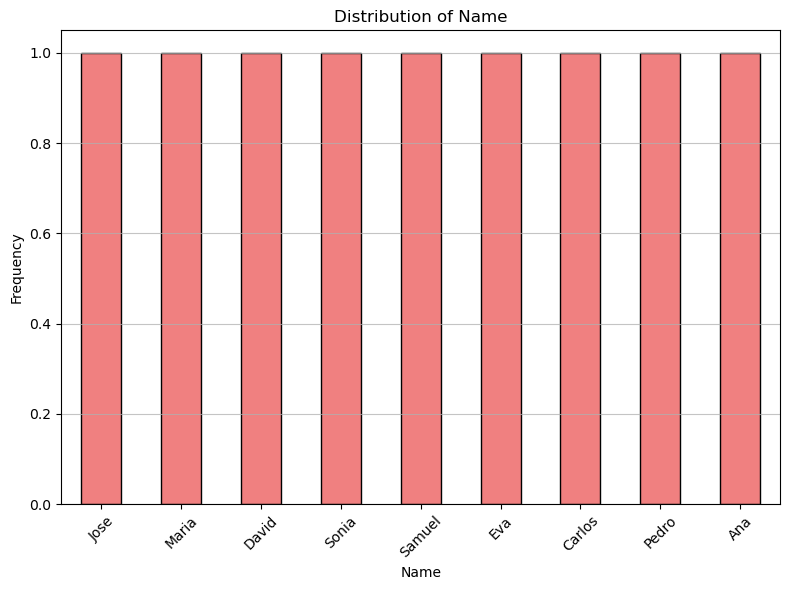

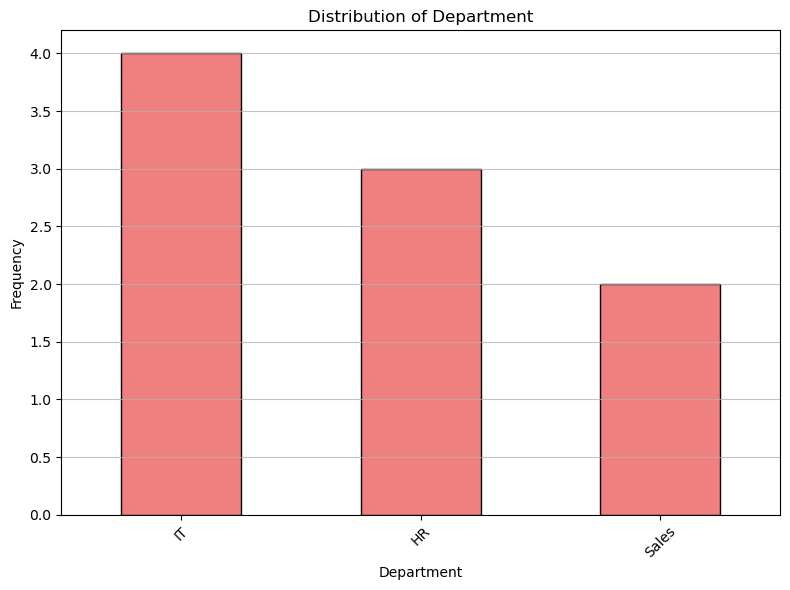

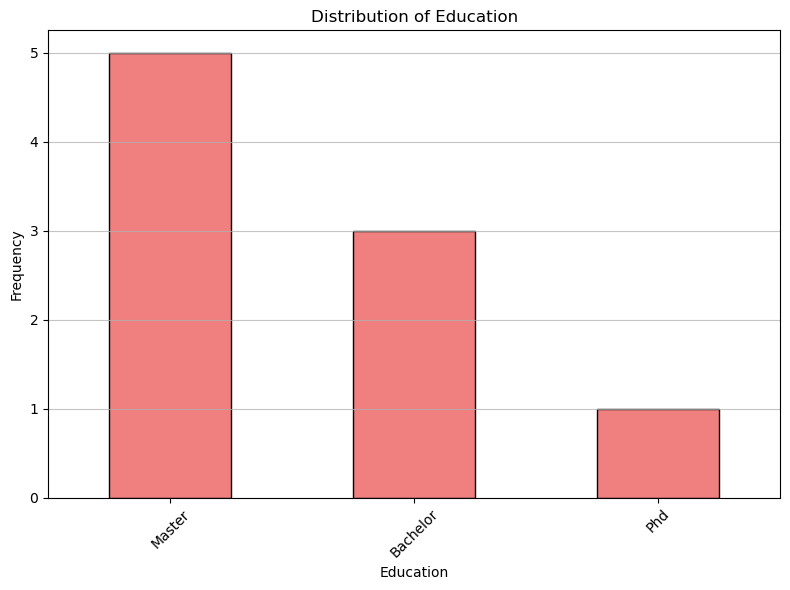

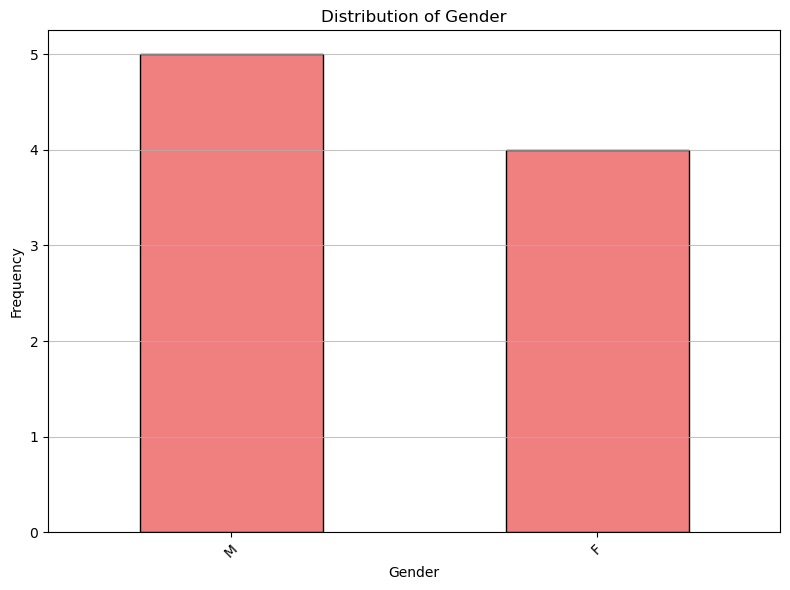

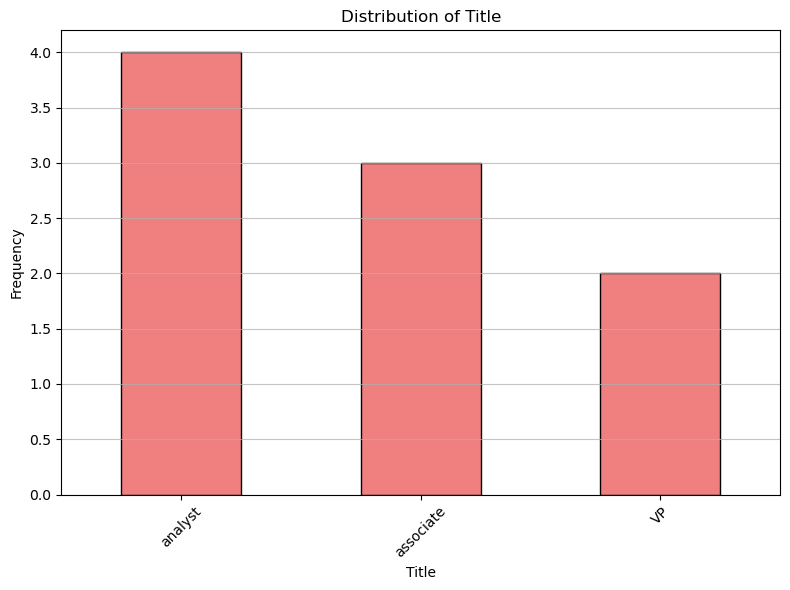

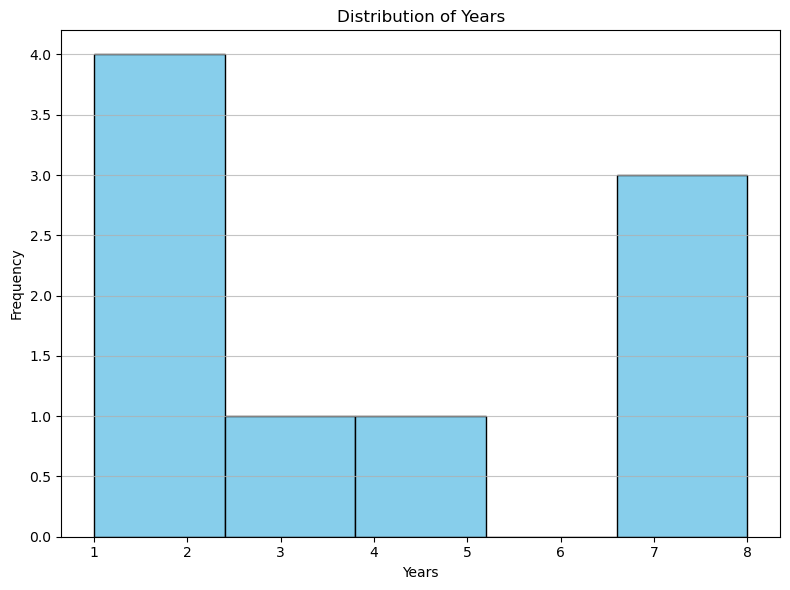

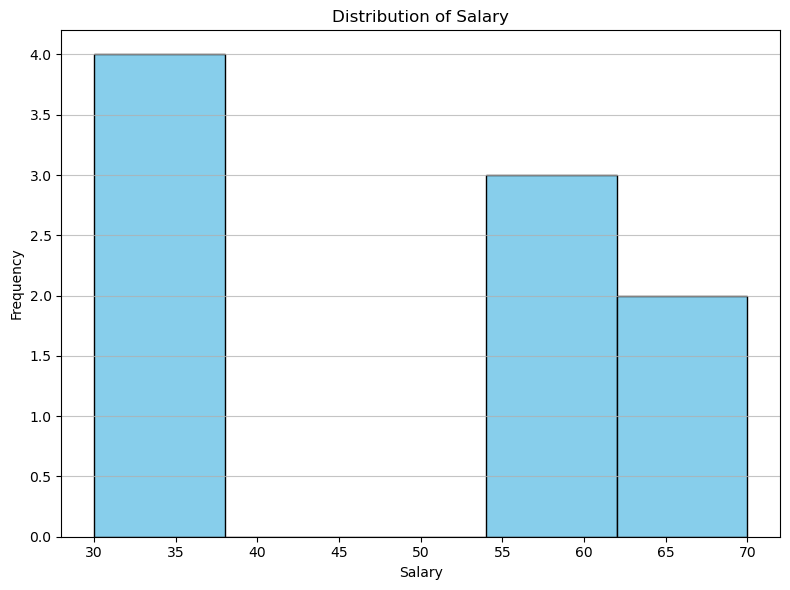

In [408]:
employee = pd.DataFrame(employee)
import matplotlib.pyplot as plt


# Define plot function based on column type
def plot_column(column_name):
    plt.figure(figsize=(8, 6))
    
    # Numeric columns: Use a histogram
    if pd.api.types.is_numeric_dtype(employee[column_name]):
        plt.hist(employee[column_name], bins=5, color="skyblue", edgecolor="black")
        plt.title(f"Distribution of {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
    
    # Categorical columns: Use a bar plot
    elif pd.api.types.is_object_dtype(employee[column_name]):
        counts = employee[column_name].value_counts()
        counts.plot(kind="bar", color="lightcoral", edgecolor="black")
        plt.title(f"Distribution of {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
    
    plt.grid(axis="y", alpha=0.75)
    plt.tight_layout()
    plt.show()

# Generate a plot for each column
for col in employee.columns:
    plot_column(col)

Departments - there are 3: IT, the biggest one, then HR and sales.
Education - there are 3 as well, being employees with master with the most, then bachelor and Phd.
Gender, there are 5 males and 4 females.
Title - There are 3 titles, being analyst with the most, than associate and VP 
Years - Most of the employees have 1,5 years in the company.
Salary - Most of the employees gets between 30 and 40. The others around 55 and 70.

#### What's the average salary in this company?

In [411]:
emp_aver = employee["Salary"].mean()
emp_aver

48.888888888888886

#### What's the highest salary?

In [413]:
emp_high = employee["Salary"].max()
emp_high

70

#### What's the lowest salary?

In [415]:
emp_low = employee["Salary"].min()
emp_low

30

#### Who are the employees with the lowest salary?

In [417]:
emp_low = employee["Salary"].min()
emp_low2 = employee[employee["Salary"] == emp_low]
emp_low2

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [419]:
david = employee[employee["Name"] == "David"]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [421]:
david_salary = employee[employee['Name'] == 'David'][['Salary']]
david_salary

,Salary
2,30


#### Print all the rows where job title is associate

In [423]:
associate = employee[employee['Title'] == 'associate']
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [425]:
first_3 = employee[:3]
first_3

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [426]:
employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [428]:
associate2 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
associate2

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [430]:
avr_sal_year = employee.groupby("Years")["Salary"].mean()
avr_sal_year

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [432]:
avr_sal_title = employee.groupby("Title")["Salary"].mean()
avr_sal_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

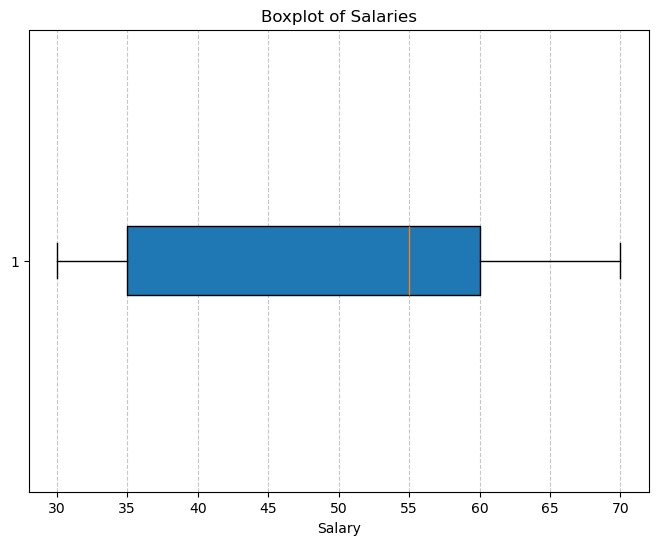

In [434]:
# Boxplot for the Salary column
plt.figure(figsize=(8, 6))
plt.boxplot(employee['Salary'], vert=False, patch_artist=True)
plt.title('Boxplot of Salaries')
plt.xlabel('Salary')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Q1 = employee['Salary'].quantile(0.25)
Q3 = employee['Salary'].quantile(0.75)



In [435]:
Q1


35.0

In [436]:
Q3

60.0

If each quartile represents 25%, then Q1 and Q3 represents 50% of salaries. The others might be outliers.

#### Is the mean salary per gender different?

In [439]:
avr_sal_gender = employee.groupby("Gender")["Salary"].mean()
avr_sal_gender

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

Females get a bit less than males.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [463]:
numeric_cols = employee.select_dtypes(include="number")
numeric_data = pd.concat([employee["Department"], numeric_cols], axis=1)

department_stats = numeric_data.groupby("Department").agg(["min", "mean", "max"])

department_stats

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [465]:
salarymaxmin = employee.groupby("Department")["Salary"].agg(["max", "min"])
salarymaxmin

,max,min
Department,,
HR,70,30
IT,70,30
Sales,55,55


In [467]:
salarymaxmin2 = employee.groupby("Department")["Salary"].apply(
    lambda x: x.max() - x.min()
)

salarymaxmin2

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

In [475]:
salarymaxmin3 = employee.groupby("Department")["Salary"].agg(max) - employee.groupby("Department")["Salary"].agg(min)

salarymaxmin3

/var/folders/cj/_ljqqgzj7bvdlj6sc0_8wd080000gn/T/ipykernel_70659/1291897402.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  salarymaxmin3 = employee.groupby("Department")["Salary"].agg(max) - employee.groupby("Department")["Salary"].agg(min)
/var/folders/cj/_ljqqgzj7bvdlj6sc0_8wd080000gn/T/ipykernel_70659/1291897402.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  salarymaxmin3 = employee.groupby("Department")["Salary"].agg(max) - employee.groupby("Department")["Salary"].agg(min)


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [469]:
orders =  pd.read_csv('orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [479]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [481]:
orders


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [489]:
summary_stats = orders.describe()
print("\nSummary Statistics:")
summary_stats



Summary Statistics:


,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


This is a large dataset based in sales, with 14 columns and no missing values. There is a unnamed column wich seems related to the invoice number.

####  What is the average Purchase Price?

In [493]:
avr_price = orders["UnitPrice"].mean()
avr_price

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [497]:
min_price = orders["UnitPrice"].min()
min_price

0.0

In [499]:
max_price = orders["UnitPrice"].max()
max_price

8142.75

#### Select all the customers we have in Spain

In [503]:
spain = orders[orders["Country"] == "Spain"]
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [511]:
spain = orders[orders["Country"] == "Spain"]
customers_spain = spain["CustomerID"].nunique()
customers_spain

30

#### Select all the customers who have bought more than 50 items ?

In [521]:
more50 = orders[orders["Quantity"] > 50]
more50id = more50["CustomerID"].nunique()
more50id

1301

#### Select orders from Spain that are above 50 items

In [525]:
more50 = orders[orders["Quantity"] > 50]
spain50 = more50[more50["Country"] == "Spain"]
spain50

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [527]:
free = orders[orders["amount_spent"] == 0]
free

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [541]:
lunch_bag = orders[orders["Description"].str.contains('lunch bag', case=False, na=False)]
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [561]:
lunch_bag = orders[orders["Description"].str.contains('lunch bag', case=False, na=False)]
lunch_bag2011 = lunch_bag[lunch_bag["year"] == 2011]
lunch_bag2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

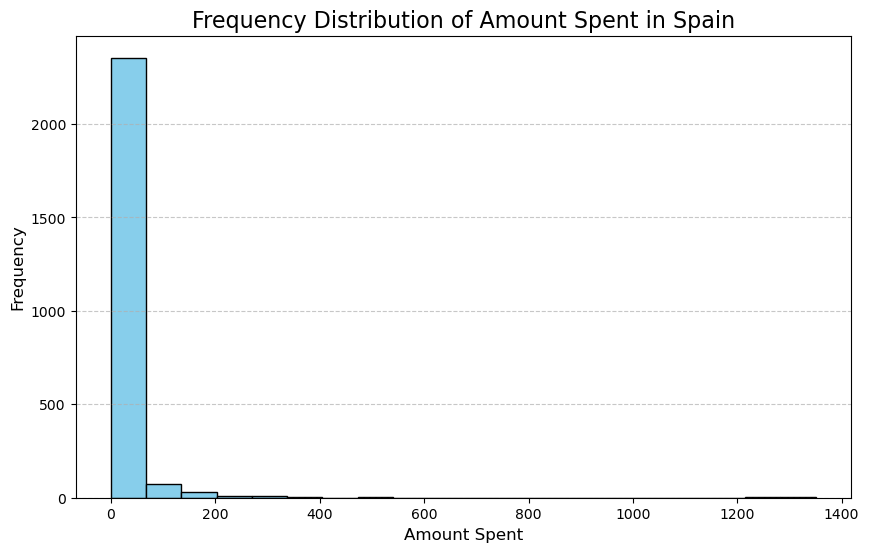

In [565]:
spain_orders = orders[orders["Country"] == "Spain"]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(spain_orders["amount_spent"], bins=20, color="skyblue", edgecolor="black")
plt.title("Frequency Distribution of Amount Spent in Spain", fontsize=16)
plt.xlabel("Amount Spent", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Select all orders made in the month of August

In [597]:
print(orders["month"].isnull().sum())

0


In [589]:
print(orders["month"].unique())

[1]


In [587]:
print(orders["month"].dtype)

int64


In [609]:
august = orders[orders["month"] == 8]
august


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [611]:
august = orders[orders["month"] == 8]
august_countries = august["Country"].value_counts()
august_countries

Series([], Name: count, dtype: int64)

#### What's the  average amount of money spent by country

In [619]:
avr_country = orders.groupby("Country")["amount_spent"].mean()
avr_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [621]:
most = orders["UnitPrice"].max()
most

8142.75

#### What was the average amount spent per year ?

In [623]:
avr_year = orders.groupby("year")["amount_spent"].mean()
avr_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64